<a href="https://colab.research.google.com/github/abdulazeem/AWS---Chandralingam/blob/master/Image_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
import os
len(os.listdir('My Drive/dataset'))

4738

In [5]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [7]:
from keras.applications import (vgg16, vgg19, xception, inception_v3,
                                inception_resnet_v2, mobilenet,
                                densenet, nasnet, mobilenet_v2)

In [8]:
# Number of Similar Images
no_of_similar_img = 8

In [ ]:
"""os.chdir'/home/jupyter/train/')
files = ['D:/Documents/MangAI/src/Dataset/pictures/' + x for x in os.listdir() if x.endswith('jpg')]
files[:10]"""

In [9]:
datapath='My Drive/dataset'
files = [x for x in os.listdir(datapath) if x.endswith('.jpg')]
len(files)

4738

In [10]:
from tqdm import tqdm

In [11]:
class RecommenderImage:
    
    def __init__(self, model, image_list, file_path):
        self.model = model
        self.file_path = file_path
        self.image_list = image_list
        #Since output.shape return object dimension just eval to get integer
        self.img_width = eval(str(self.model.layers[0].output.shape[1]))
        self.img_height = eval(str(self.model.layers[0].output.shape[2]))
        #Removing last layers in order to get features instead of predictions
        self.img_feat_ext = Model(inputs = self.model.input, outputs=self.model.layers[-2].output)
        self.prcsd_img = self.Img2Mat()
        self.similarity_chart = self.GetSimilarity(self.prcsd_img)
    
    def get_images(self, image_link):
        try:
            return load_img(self.file_path+image_link, target_size=(self.img_width, self.img_height))
        except OSError:
            #image unreadable //remove from list
            self.image_list = [x for x in self.image_list if x!=image_link]
            #self.list_of_image.remove(image_url)
            pass
        
    def Img2Mat(self) :
        """
        # convert the PIL image to a numpy array
        # in PIL - image is in (width, height, channel)
        # in Numpy - image is in (height, width, channel)
        # convert the image / images into batch format
        # expand_dims will add an extra dimension to the data at a particular axis
        # we want the input matrix to the network to be of the form (batchsize, height, width, channels)
        # thus we add the extra dimension to the axis 0.
        """
        #from keras.preprocessing.image import load_img,img_to_array
        
        list_of_expanded_array = list()
        
        for i in tqdm(range(len(self.image_list) - 1)) :
            try :
                tmp = img_to_array(self.get_images(self.image_list[i]))
                expand = np.expand_dims(tmp, axis = 0)
                list_of_expanded_array.append(expand)
            except ValueError : 
                self.image_list = [x for x in self.image_list if x != self.image_list[i]]
                #self.image_list.remove(self.list_of_image[i])
        images = np.vstack(list_of_expanded_array)
        """
        list_of_expanded_array = [try np.expand_dims(img_to_array(self.ddl_images(self.list_of_image[i])), axis = 0) except ValueError pass \
                                  for i in tqdm(range(len(self.list_of_image)))]
        images = np.vstack(list_of_expanded_array)
        #from keras.applications.imagenet_utils import preprocess_input()
        # prepare the image for the  model"
        """
        return preprocess_input(images)
    
    def GetSimilarity(self, prcsd_img) :
        print('============ algorithm predict featurs =========')
        imgs_features = self.img_feat_ext.predict(prcsd_img)
        print("Our image has %i features:" %imgs_features.size)
        
        cosSimilarities = cosine_similarity(imgs_features)
        cos_similarities_df = pd.DataFrame(cosSimilarities, 
                                           columns=self.image_list[:len(self.image_list) -1],
                                           index=self.image_list[:len(self.image_list) -1])
        return cos_similarities_df
    
    def most_similar_to(self, given_img, no_of_similar_img = 8):

        print("-----------------------------------------------------------------------")
        print("original manga:")

        original = self.get_images(given_img)
        plt.imshow(original)
        plt.show()

        print("-----------------------------------------------------------------------")
        print("most similar manga:")

        closest_imgs = self.similarity_chart[given_img].sort_values(ascending=False)[1:no_of_similar_img+1].index
        closest_imgs_scores = self.similarity_chart[given_img].sort_values(ascending=False)[1:no_of_similar_img+1]

        for i in range(0,len(closest_imgs)):
            original = self.get_images(closest_imgs[i])
            plt.imshow(original)
            plt.show()
            print("similarity score : ",closest_imgs_scores[i])

In [12]:
vgg_model = vgg16.VGG16(weights='imagenet')

mobv2= mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, 
                                       include_top=True, 
                                       weights='imagenet')

14540800/14536120 [==============================] - 0s 0us/step


In [13]:
pretrained_model = mobv2
pretrained_recommender = RecommenderImage(pretrained_model, files, file_path = 'My Drive/dataset/')

100%|██████████| 4737/4737 [16:45<00:00,  4.71it/s]


============ algorithm predict featurs =========
Our image has 6063360 features:


Most similar to OnePunch-Man
-----------------------------------------------------------------------
original manga:


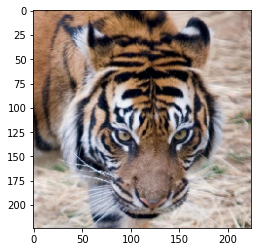

-----------------------------------------------------------------------
most similar manga:


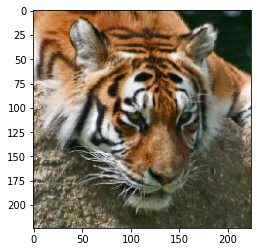

similarity score :  0.8663268


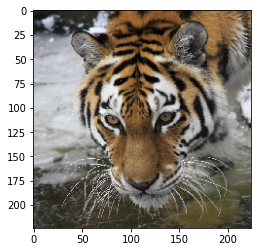

similarity score :  0.8630213


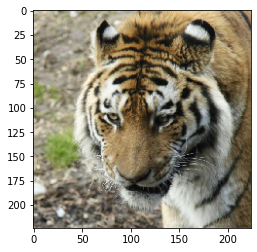

similarity score :  0.85734856


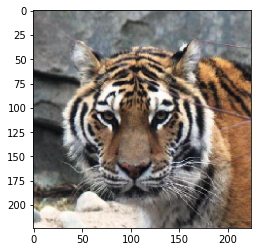

similarity score :  0.8563919


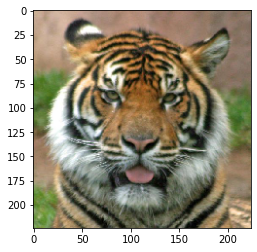

similarity score :  0.85524124


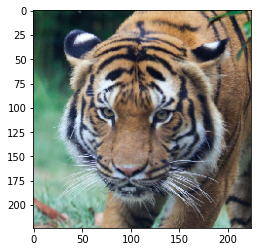

similarity score :  0.85497


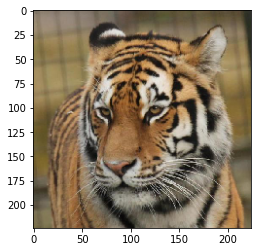

similarity score :  0.85222965


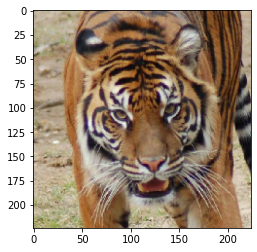

similarity score :  0.85205114
-----------------------------------------------------------------------
original manga:


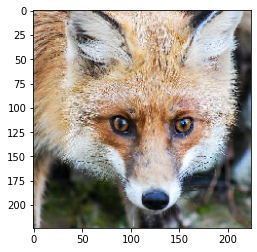

-----------------------------------------------------------------------
most similar manga:


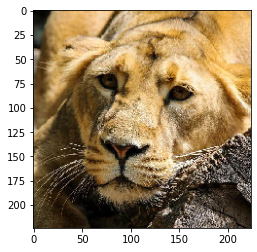

similarity score :  0.83876586


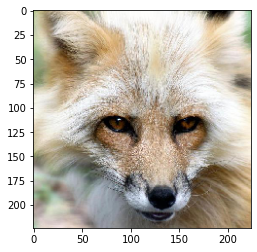

similarity score :  0.83776045


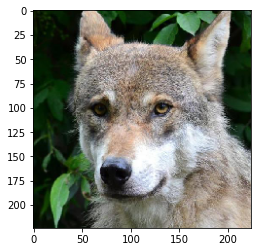

similarity score :  0.83656156


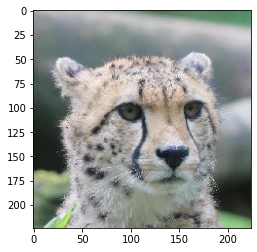

similarity score :  0.83598


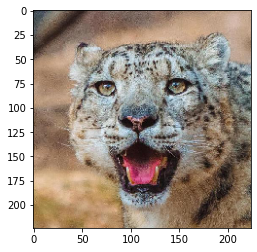

similarity score :  0.83098984


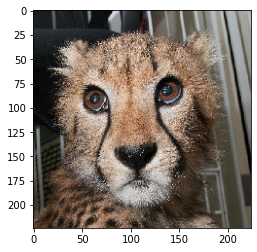

similarity score :  0.829785


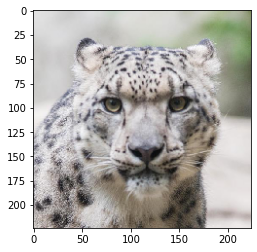

similarity score :  0.8270716


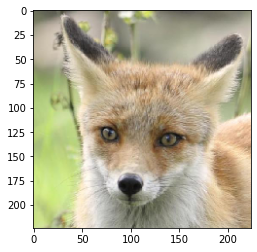

similarity score :  0.82595205


In [14]:
#pretrained_recommender.most_similar_to(files[naruto_index])
print('Most similar to OnePunch-Man')
#pretrained_recommender.most_similar_to(files[onepunch_index])
print('=========================================')
pretrained_recommender.most_similar_to(files[777])
print('=========================================')
pretrained_recommender.most_similar_to(files[23])

In [55]:
len(os.listdir(file_path))

4738

In [ ]:
nasnetmobile = nasnet.NASNetMobile(weights="imagenet")

mobilenet_ = mobilenet.MobileNet(weights="imagenet")

incepv2 = inception_resnet_v2.InceptionResNetV2(include_top=True, weights='imagenet', 
                                                input_tensor=None, input_shape=None, pooling=None, classes=1000)

incepv3 = inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, 
                                   input_shape=None, pooling=None, classes=1000)

Xception_ = xception.Xception(include_top=True, weights='imagenet', input_tensor=None, 
                              input_shape=None, pooling=None, classes=1000)

In [ ]:
import tqdm